In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
pd.set_option('display.max_columns', None)
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("dc_metro_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'year', 'name', 'parent-location',
       'population', 'poverty-rate', 'renter-occupied-households',
       'pct-renter-occupied', 'median-gross-rent', 'median-household-income',
       'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am',
       'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple',
       'pct-other', 'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed', 'Symbol'],
      dtype='object')

In [4]:
%%time
clean_transaction_list = []

for item in df.columns:
    item = item.upper()
    item = item.replace("-"," ")
    if item == "NAME":
        item = item.replace("NAME","CENSUS TRACT")
    if item == "PARENT LOCATION":
            item = item.replace("PARENT LOCATION","COUNTY NAME")
    clean_transaction_list.append(item)
    
df.columns = clean_transaction_list

CPU times: user 66.7 ms, sys: 2.55 ms, total: 69.3 ms
Wall time: 76 ms


In [5]:
df.columns

Index(['UNNAMED: 0', 'UNNAMED: 0.1', 'YEAR', 'CENSUS TRACT', 'COUNTY NAME',
       'POPULATION', 'POVERTY RATE', 'RENTER OCCUPIED HOUSEHOLDS',
       'PCT RENTER OCCUPIED', 'MEDIAN GROSS RENT', 'MEDIAN HOUSEHOLD INCOME',
       'MEDIAN PROPERTY VALUE', 'RENT BURDEN', 'PCT WHITE', 'PCT AF AM',
       'PCT HISPANIC', 'PCT AM IND', 'PCT ASIAN', 'PCT NH PI', 'PCT MULTIPLE',
       'PCT OTHER', 'EVICTION FILINGS', 'EVICTIONS', 'EVICTION RATE',
       'EVICTION FILING RATE', 'LOW FLAG', 'IMPUTED', 'SUBBED', 'SYMBOL'],
      dtype='object')

In [6]:
df=df.drop(df.columns[0], axis =1)

In [7]:
df=df.drop(df.columns[0], axis =1)
df=df.drop(columns = "SUBBED")

In [8]:
df['COUNTY NAME'] = df['COUNTY NAME'].apply(lambda x: x.upper())

In [9]:
df['COUNTY NAME'] = df['COUNTY NAME'].apply(lambda x: x.replace(" DISTRICT OF COLUMBIA", "DC"))

In [10]:
df['COUNTY NAME'] = df['COUNTY NAME'].apply(lambda x: x.replace("MARYLAND","MD"))

In [11]:
df['COUNTY NAME'] = df['COUNTY NAME'].apply(lambda x: x.replace("VIRGINIA","VA"))

In [12]:
df['COUNTY NAME'] = df['COUNTY NAME'].apply(lambda x: x.replace("DISTRICT OF COLUMBIA","WASHINGTON"))

In [13]:
#df = df[df["COUNTY NAME"] != "MONTGOMERY COUNTY, MD"]

In [14]:
(df[df["YEAR"] >= 2012].isna()).sum()


YEAR                             0
CENSUS TRACT                     0
COUNTY NAME                      0
POPULATION                       0
POVERTY RATE                     0
RENTER OCCUPIED HOUSEHOLDS       0
PCT RENTER OCCUPIED              0
MEDIAN GROSS RENT             1040
MEDIAN HOUSEHOLD INCOME        110
MEDIAN PROPERTY VALUE          495
RENT BURDEN                    880
PCT WHITE                        0
PCT AF AM                        0
PCT HISPANIC                     0
PCT AM IND                       0
PCT ASIAN                        0
PCT NH PI                        0
PCT MULTIPLE                     0
PCT OTHER                        0
EVICTION FILINGS              2810
EVICTIONS                     2810
EVICTION RATE                 2810
EVICTION FILING RATE          2810
LOW FLAG                         0
IMPUTED                          0
SYMBOL                           0
dtype: int64

In [15]:
clean_df = df.dropna(subset=["EVICTION FILINGS","EVICTIONS","EVICTION RATE","EVICTION FILING RATE"])
clean_df

,YEAR,CENSUS TRACT,COUNTY NAME,POPULATION,POVERTY RATE,RENTER OCCUPIED HOUSEHOLDS,PCT RENTER OCCUPIED,MEDIAN GROSS RENT,MEDIAN HOUSEHOLD INCOME,MEDIAN PROPERTY VALUE,RENT BURDEN,PCT WHITE,PCT AF AM,PCT HISPANIC,PCT AM IND,PCT ASIAN,PCT NH PI,PCT MULTIPLE,PCT OTHER,EVICTION FILINGS,EVICTIONS,EVICTION RATE,EVICTION FILING RATE,LOW FLAG,IMPUTED,SYMBOL
1074,2006,1.0,"WASHINGTON,DC",4701.0,1.74,1257.0,47.67,1494.0,122455.0,1000001.0,28.8,85.07,1.72,9.40,1.68,1.70,0.00,0.43,0.00,85.0,0.0,0.00,6.76,0,0,dc
1075,2006,2.01,"WASHINGTON,DC",3598.0,0.00,6.0,12.50,2001.0,119722.0,916700.0,50.0,80.74,3.14,5.86,0.00,9.87,0.00,0.39,0.00,0.0,0.0,0.00,0.00,0,0,dc
1076,2006,2.02,"WASHINGTON,DC",4080.0,0.00,870.0,38.85,2001.0,119688.0,958300.0,42.1,88.92,1.86,2.94,0.00,4.46,0.00,0.96,0.86,61.0,0.0,0.00,7.01,0,0,dc
1077,2006,3.0,"WASHINGTON,DC",5168.0,0.00,1476.0,44.77,1610.0,91804.0,797300.0,31.7,83.42,1.74,9.33,1.08,3.72,0.00,0.72,0.00,67.0,5.0,0.34,4.54,0,0,dc
1078,2006,4.0,"WASHINGTON,DC",1379.0,0.00,209.0,27.75,1607.0,176494.0,1000001.0,30.4,81.36,1.38,14.94,0.00,2.32,0.00,0.00,0.00,14.0,0.0,0.00,6.69,0,0,dc
1079,2006,5.01,"WASHINGTON,DC",3126.0,9.14,1582.0,75.99,1567.0,92109.0,595600.0,23.0,80.01,2.98,8.70,0.61,6.05,0.00,1.66,0.00,92.0,8.0,0.51,5.81,0,0,dc
1080,2006,5.02,"WASHINGTON,DC",3129.0,2.97,877.0,46.72,1218.0,94598.0,852300.0,24.9,75.87,2.52,7.54,0.00,11.98,0.00,2.08,0.00,87.0,0.0,0.00,9.92,0,0,dc
1081,2006,6.0,"WASHINGTON,DC",5420.0,2.93,715.0,29.71,1399.0,110000.0,1000001.0,25.4,76.40,11.01,3.36,0.46,3.58,0.33,2.68,2.18,86.0,4.0,0.56,12.03,0,0,dc
1082,2006,7.01,"WASHINGTON,DC",4284.0,0.00,1487.0,34.33,1204.0,77019.0,411200.0,27.9,77.87,5.88,6.54,0.00,5.77,0.00,3.13,0.82,147.0,1.0,0.07,9.89,0,0,dc
1083,2006,7.02,"WASHINGTON,DC",2899.0,8.88,1742.0,72.70,1242.0,56875.0,345100.0,28.4,62.47,11.59,10.04,0.00,7.49,0.00,1.21,7.21,97.0,8.0,0.46,5.57,0,0,dc


In [16]:
moco_md = df[df["COUNTY NAME"] == "MONTGOMERY COUNTY, MD"]
pg_md = df[df["COUNTY NAME"] == "PRINCE GEORGE'S COUNTY, MD"]
dc = df[df["COUNTY NAME"] == "WASHINGTON,DC"]
fcc_va = df[df["COUNTY NAME"] == 'FALLS CHURCH CITY, VA']
alex_va = df[df["COUNTY NAME"] == 'ALEXANDRIA CITY, VA']
arco_va = df[df["COUNTY NAME"] == 'ARLINGTON COUNTY, VA']
fxco_va = df[df["COUNTY NAME"] == 'FAIRFAX COUNTY, VA']

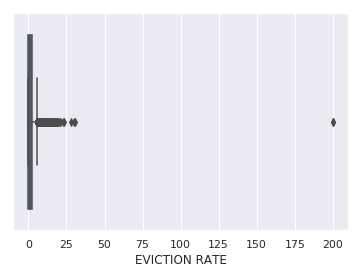

In [17]:
sns.boxplot(x=clean_df["EVICTION RATE"])

In [18]:
clean_df.describe()

,YEAR,POPULATION,POVERTY RATE,RENTER OCCUPIED HOUSEHOLDS,PCT RENTER OCCUPIED,MEDIAN GROSS RENT,MEDIAN HOUSEHOLD INCOME,MEDIAN PROPERTY VALUE,RENT BURDEN,PCT WHITE,PCT AF AM,PCT HISPANIC,PCT AM IND,PCT ASIAN,PCT NH PI,PCT MULTIPLE,PCT OTHER,EVICTION FILINGS,EVICTIONS,EVICTION RATE,EVICTION FILING RATE,LOW FLAG,IMPUTED
count,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,10965.000000,11858.000000,1.155800e+04,11100.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000,11952.000000
mean,2009.400770,2122.526113,6.126191,344.847139,37.183785,1502.988102,98043.626448,4.144521e+05,27.479056,48.773858,22.847731,13.483881,0.178515,11.160207,0.059031,2.614846,0.312955,116.894076,5.694026,1.558969,15.991464,0.269662,0.054301
std,4.769056,1388.379099,8.471136,393.799940,28.869669,640.088573,47007.894267,2.285087e+05,9.559383,28.060044,28.950198,14.101317,0.468880,10.654286,0.369649,2.663903,0.864352,391.317018,11.492417,3.336697,41.553801,0.443803,0.226619
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1140.760000,0.000000,63.000000,11.270000,1078.000000,62210.000000,2.407000e+05,22.600000,24.635000,2.780000,4.100000,0.000000,2.950000,0.000000,0.980000,0.000000,1.000000,0.000000,0.000000,0.857500,0.000000,0.000000
50%,2011.000000,1767.000000,3.160000,183.000000,30.055000,1430.000000,89846.500000,3.712000e+05,26.700000,53.015000,9.100000,8.310000,0.000000,8.440000,0.000000,2.050000,0.000000,4.000000,2.000000,0.880000,3.190000,0.000000,0.000000
75%,2014.000000,2677.000000,8.412500,503.250000,60.110000,1912.000000,125157.692500,5.417000e+05,32.400000,72.320000,30.730000,18.700000,0.190000,16.090000,0.000000,3.430000,0.300000,35.000000,6.000000,2.140000,8.530000,1.000000,0.000000
max,2016.000000,15934.000000,65.220000,3670.000000,100.000000,3501.000000,250001.000000,2.000001e+06,50.100000,100.000000,100.000000,94.620000,16.760000,66.760000,18.330000,30.500000,17.360000,6083.000000,178.000000,200.000000,627.550000,1.000000,1.000000


In [19]:
clean_df = clean_df[clean_df["EVICTION RATE"] != 200]

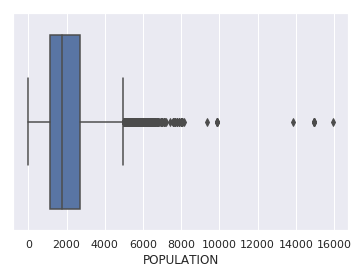

In [20]:
sns.boxplot(x=clean_df["POPULATION"])

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

YEAR                               8.0000
POPULATION                      2063.0000
POVERTY RATE                       8.1900
RENTER OCCUPIED HOUSEHOLDS       491.0000
PCT RENTER OCCUPIED               47.8300
MEDIAN GROSS RENT                833.7925
MEDIAN HOUSEHOLD INCOME        59730.0000
MEDIAN PROPERTY VALUE         309700.0000
RENT BURDEN                        8.9100
PCT WHITE                         46.2900
PCT AF AM                         28.0700
PCT HISPANIC                      13.6200
PCT AM IND                         0.2300
PCT ASIAN                         12.0100
PCT NH PI                          0.0000
PCT MULTIPLE                       2.0900
PCT OTHER                          0.3400
EVICTION FILINGS                  34.0000
EVICTIONS                          6.0000
EVICTION RATE                      2.1400
EVICTION FILING RATE               7.6725
LOW FLAG                           0.0000
IMPUTED                            0.0000
dtype: float64


Text(0,0.5,'MEDIAN GROSS RENT IN $')

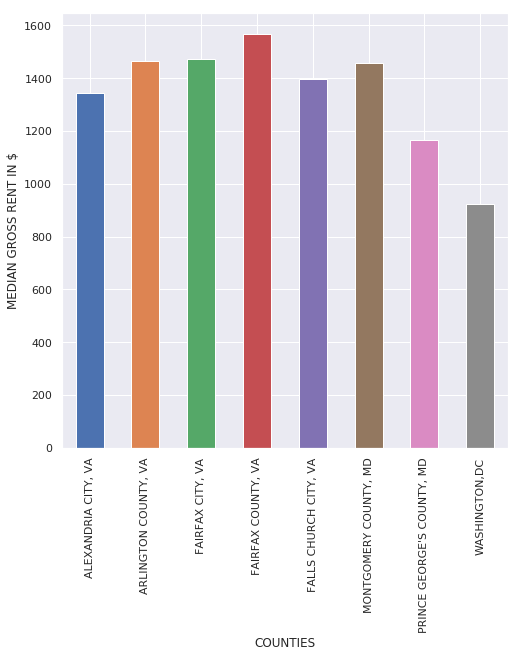

In [22]:
income = df.groupby(df['COUNTY NAME']).median()
income["MEDIAN GROSS RENT"].plot.bar(figsize=(8,8))
plt.xlabel("COUNTIES")
plt.ylabel('MEDIAN GROSS RENT IN $')

<Figure size 1080x1080 with 0 Axes>

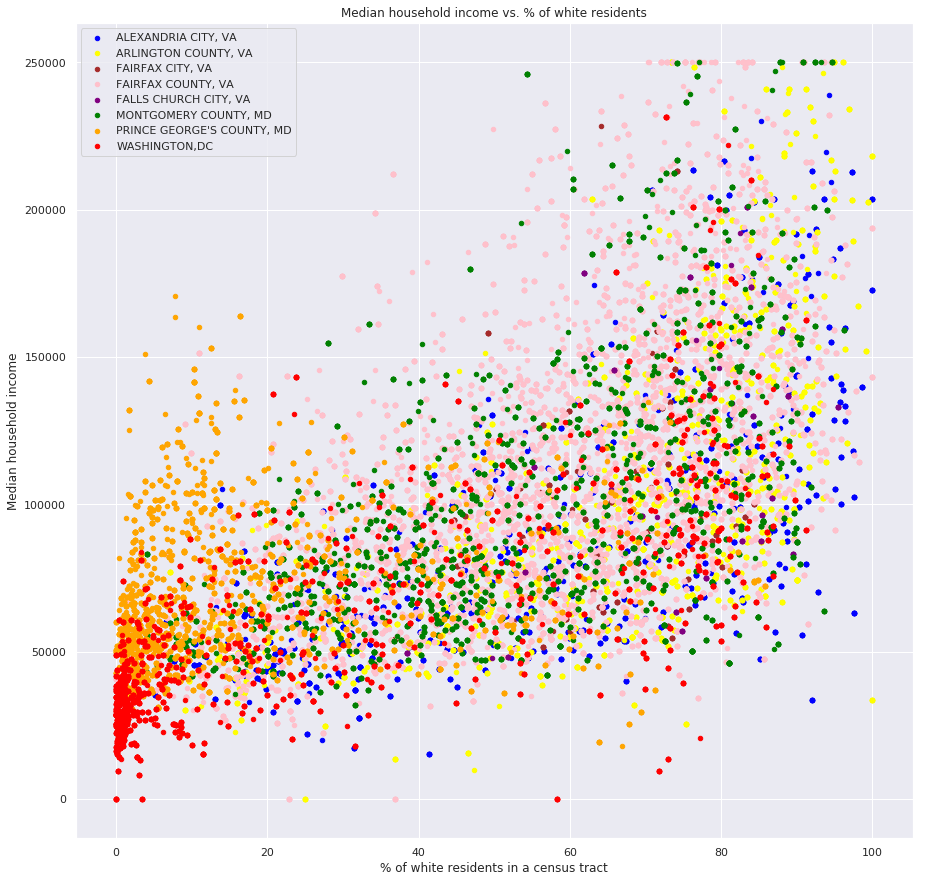

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))

colors = {
    "MONTGOMERY COUNTY, MD": "green",
    "PRINCE GEORGE'S COUNTY, MD": "orange",
    "WASHINGTON,DC": "red",
    'FALLS CHURCH CITY, VA': "purple",
    'ALEXANDRIA CITY, VA': "blue",
    'ARLINGTON COUNTY, VA':"yellow",
    'FAIRFAX COUNTY, VA':"pink",
    'FAIRFAX CITY, VA':"brown"
    
    
}

_, ax = plt.subplots()
for key, group in df.groupby("COUNTY NAME"):
    group.plot.scatter(ax=ax, x="PCT WHITE", y="MEDIAN HOUSEHOLD INCOME", label=key, color=colors[key], figsize=(15,15))
    ax.set_xlabel("% of white residents in a census tract")
ax.set_ylabel("Median household income")
_ = ax.set_title(
    "Median household income vs. % of white residents"
)

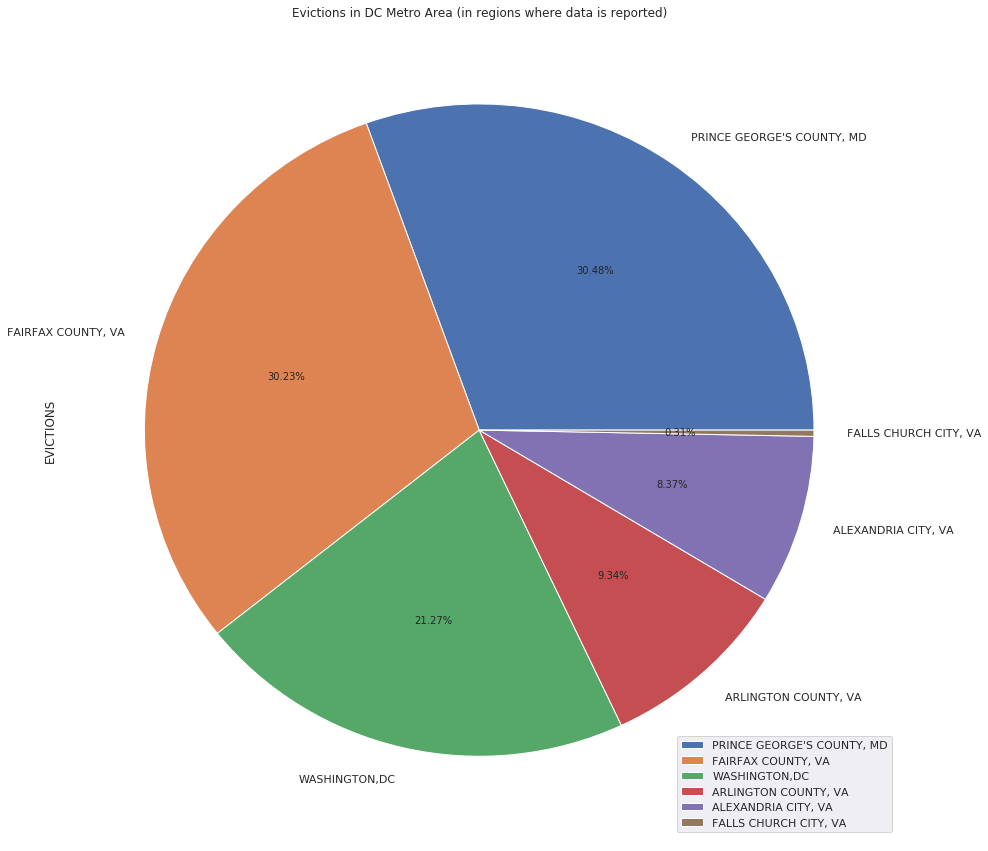

In [24]:
df_pie = (
    clean_df.groupby(['COUNTY NAME'])["EVICTIONS"]
    .sum()
    .reset_index(name="EVICTIONS")
    .sort_values(by="EVICTIONS", ascending=False)
)
ax = df_pie.plot.pie(y="EVICTIONS", labels=df_pie["COUNTY NAME"], autopct="%1.2f%%", figsize=(15,15))
_ = ax.set_title("Evictions in DC Metro Area (in regions where data is reported)")

In [25]:
#clean_eviction_data = clean_df.to_csv('clean_eviction_data.csv', index=True)
#clean_rent_and_income_data = df.to_csv('clean_rent_and_income_data.csv', index=True)

In [26]:
df

,YEAR,CENSUS TRACT,COUNTY NAME,POPULATION,POVERTY RATE,RENTER OCCUPIED HOUSEHOLDS,PCT RENTER OCCUPIED,MEDIAN GROSS RENT,MEDIAN HOUSEHOLD INCOME,MEDIAN PROPERTY VALUE,RENT BURDEN,PCT WHITE,PCT AF AM,PCT HISPANIC,PCT AM IND,PCT ASIAN,PCT NH PI,PCT MULTIPLE,PCT OTHER,EVICTION FILINGS,EVICTIONS,EVICTION RATE,EVICTION FILING RATE,LOW FLAG,IMPUTED,SYMBOL
0,2000,1.0,"WASHINGTON,DC",4674.0,5.20,1279.0,46.95,981.0,92540.0,587000.0,22.0,86.84,3.98,4.11,0.15,3.49,0.06,1.13,0.24,NaN,NaN,NaN,NaN,0,0,dc
1,2000,2.01,"WASHINGTON,DC",4467.0,71.14,13.0,46.43,0.0,87904.0,122700.0,0.0,86.23,5.35,1.68,0.00,5.42,1.25,0.04,0.02,NaN,NaN,NaN,NaN,0,0,dc
2,2000,2.02,"WASHINGTON,DC",3850.0,24.47,836.0,43.63,1396.0,90653.0,579100.0,36.0,86.08,1.56,4.94,0.05,5.22,0.03,1.77,0.36,NaN,NaN,NaN,NaN,0,0,dc
3,2000,3.0,"WASHINGTON,DC",5706.0,15.62,1453.0,52.19,989.0,73558.0,324200.0,22.5,82.84,2.98,5.68,0.12,5.73,0.04,2.31,0.30,NaN,NaN,NaN,NaN,0,0,dc
4,2000,4.0,"WASHINGTON,DC",1510.0,3.00,208.0,32.05,1257.0,129133.0,780100.0,24.3,78.74,4.37,8.15,0.07,5.83,0.00,2.72,0.13,NaN,NaN,NaN,NaN,0,0,dc
5,2000,5.01,"WASHINGTON,DC",2765.0,5.96,1464.0,81.65,976.0,65521.0,430000.0,19.1,81.84,4.74,5.68,0.18,5.57,0.07,1.74,0.18,NaN,NaN,NaN,NaN,0,0,dc
6,2000,5.02,"WASHINGTON,DC",3112.0,4.34,929.0,53.30,921.0,66815.0,569300.0,23.5,84.58,2.41,7.13,0.03,3.82,0.00,1.61,0.42,NaN,NaN,NaN,NaN,0,0,dc
7,2000,6.0,"WASHINGTON,DC",4919.0,4.80,769.0,35.87,874.0,89507.0,535600.0,21.8,74.59,12.67,6.73,0.26,3.58,0.00,1.75,0.43,NaN,NaN,NaN,NaN,0,0,dc
8,2000,7.01,"WASHINGTON,DC",4395.0,5.76,1491.0,51.15,757.0,53470.0,448200.0,22.4,79.93,3.34,8.53,0.11,5.69,0.07,2.05,0.27,NaN,NaN,NaN,NaN,0,0,dc
9,2000,7.02,"WASHINGTON,DC",3326.0,18.95,1834.0,79.88,764.0,37244.0,339700.0,24.1,69.90,6.13,10.76,0.33,8.24,0.06,3.85,0.72,NaN,NaN,NaN,NaN,0,0,dc


In [27]:
clean_df

,YEAR,CENSUS TRACT,COUNTY NAME,POPULATION,POVERTY RATE,RENTER OCCUPIED HOUSEHOLDS,PCT RENTER OCCUPIED,MEDIAN GROSS RENT,MEDIAN HOUSEHOLD INCOME,MEDIAN PROPERTY VALUE,RENT BURDEN,PCT WHITE,PCT AF AM,PCT HISPANIC,PCT AM IND,PCT ASIAN,PCT NH PI,PCT MULTIPLE,PCT OTHER,EVICTION FILINGS,EVICTIONS,EVICTION RATE,EVICTION FILING RATE,LOW FLAG,IMPUTED,SYMBOL
1074,2006,1.0,"WASHINGTON,DC",4701.0,1.74,1257.0,47.67,1494.0,122455.0,1000001.0,28.8,85.07,1.72,9.40,1.68,1.70,0.00,0.43,0.00,85.0,0.0,0.00,6.76,0,0,dc
1075,2006,2.01,"WASHINGTON,DC",3598.0,0.00,6.0,12.50,2001.0,119722.0,916700.0,50.0,80.74,3.14,5.86,0.00,9.87,0.00,0.39,0.00,0.0,0.0,0.00,0.00,0,0,dc
1076,2006,2.02,"WASHINGTON,DC",4080.0,0.00,870.0,38.85,2001.0,119688.0,958300.0,42.1,88.92,1.86,2.94,0.00,4.46,0.00,0.96,0.86,61.0,0.0,0.00,7.01,0,0,dc
1077,2006,3.0,"WASHINGTON,DC",5168.0,0.00,1476.0,44.77,1610.0,91804.0,797300.0,31.7,83.42,1.74,9.33,1.08,3.72,0.00,0.72,0.00,67.0,5.0,0.34,4.54,0,0,dc
1078,2006,4.0,"WASHINGTON,DC",1379.0,0.00,209.0,27.75,1607.0,176494.0,1000001.0,30.4,81.36,1.38,14.94,0.00,2.32,0.00,0.00,0.00,14.0,0.0,0.00,6.69,0,0,dc
1079,2006,5.01,"WASHINGTON,DC",3126.0,9.14,1582.0,75.99,1567.0,92109.0,595600.0,23.0,80.01,2.98,8.70,0.61,6.05,0.00,1.66,0.00,92.0,8.0,0.51,5.81,0,0,dc
1080,2006,5.02,"WASHINGTON,DC",3129.0,2.97,877.0,46.72,1218.0,94598.0,852300.0,24.9,75.87,2.52,7.54,0.00,11.98,0.00,2.08,0.00,87.0,0.0,0.00,9.92,0,0,dc
1081,2006,6.0,"WASHINGTON,DC",5420.0,2.93,715.0,29.71,1399.0,110000.0,1000001.0,25.4,76.40,11.01,3.36,0.46,3.58,0.33,2.68,2.18,86.0,4.0,0.56,12.03,0,0,dc
1082,2006,7.01,"WASHINGTON,DC",4284.0,0.00,1487.0,34.33,1204.0,77019.0,411200.0,27.9,77.87,5.88,6.54,0.00,5.77,0.00,3.13,0.82,147.0,1.0,0.07,9.89,0,0,dc
1083,2006,7.02,"WASHINGTON,DC",2899.0,8.88,1742.0,72.70,1242.0,56875.0,345100.0,28.4,62.47,11.59,10.04,0.00,7.49,0.00,1.21,7.21,97.0,8.0,0.46,5.57,0,0,dc


In [28]:
rent_df = df[~df.isin(clean_df)]

In [29]:
rent_df = rent_df.dropna(subset=['YEAR'])

In [30]:
rent_df = rent_df.drop(columns = ["EVICTION FILINGS","EVICTIONS","EVICTION RATE","EVICTION FILING RATE"])

In [31]:
rent_df.isnull().sum()

YEAR                            0
CENSUS TRACT                    0
COUNTY NAME                     0
POPULATION                      0
POVERTY RATE                    0
RENTER OCCUPIED HOUSEHOLDS      0
PCT RENTER OCCUPIED             0
MEDIAN GROSS RENT             349
MEDIAN HOUSEHOLD INCOME        48
MEDIAN PROPERTY VALUE         284
RENT BURDEN                   341
PCT WHITE                       0
PCT AF AM                       0
PCT HISPANIC                    0
PCT AM IND                      0
PCT ASIAN                       0
PCT NH PI                       0
PCT MULTIPLE                    0
PCT OTHER                       0
LOW FLAG                        0
IMPUTED                         0
SYMBOL                          0
dtype: int64

In [32]:
clean_df = clean_df.drop(columns = ['MEDIAN GROSS RENT', 'MEDIAN HOUSEHOLD INCOME','MEDIAN PROPERTY VALUE', 'RENT BURDEN'])

In [33]:
clean_df.isnull().sum()

YEAR                          0
CENSUS TRACT                  0
COUNTY NAME                   0
POPULATION                    0
POVERTY RATE                  0
RENTER OCCUPIED HOUSEHOLDS    0
PCT RENTER OCCUPIED           0
PCT WHITE                     0
PCT AF AM                     0
PCT HISPANIC                  0
PCT AM IND                    0
PCT ASIAN                     0
PCT NH PI                     0
PCT MULTIPLE                  0
PCT OTHER                     0
EVICTION FILINGS              0
EVICTIONS                     0
EVICTION RATE                 0
EVICTION FILING RATE          0
LOW FLAG                      0
IMPUTED                       0
SYMBOL                        0
dtype: int64

In [34]:
clean_df.to_csv('clean_eviction_data.csv')
rent_df.to_csv('clean_rent_and_income_data.csv')